In [1]:
import matplotlib.pyplot as plt

from project_config import get_data_path
from src.SolverAnalyses import ConvergenceAnalysis
from src.DataFrameAnalyses import DataFramePlotGenerator

In [2]:
logs_path = get_data_path("solver_logs")

log_file = "hpc_experiment002_shift_04.log"
log_path = logs_path / log_file

In [3]:
df_cp_logs = ConvergenceAnalysis.parse_cp_sat_bound_log_to_dataframe(
    file_path=log_path,

)
df_cp_logs

,Time,BestSol
0,0.06,150136.0
1,0.09,150136.0
2,0.11,40901.0
3,0.14,40901.0
4,0.17,40901.0
...,...,...
208,5854.67,6171.0
209,6020.92,6171.0
210,6155.32,6171.0
211,6549.16,6171.0


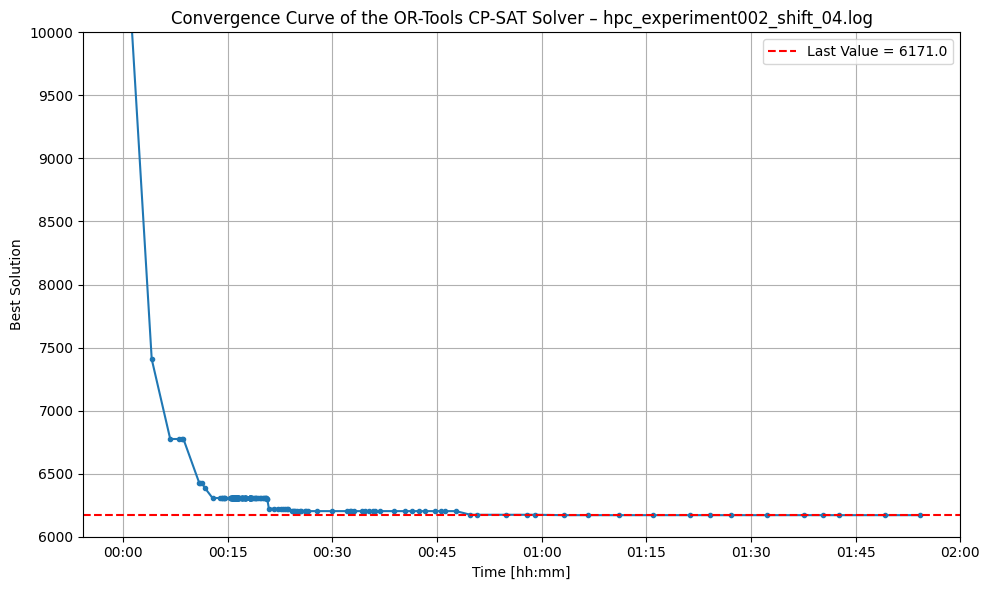

In [4]:
fig = DataFramePlotGenerator.get_convergence_plot_figure(df_cp_logs, time_col="Time", bestsol_col="BestSol", granularity="quarter",subtitle=log_file,
    y_max= 10000
)
last_val = df_cp_logs["BestSol"].iloc[-1]

ax = fig.axes[0]
ax.axhline(y=last_val, color="red", linestyle="--", label=f"Last Value = {last_val}")
ax.legend()
plt.show()

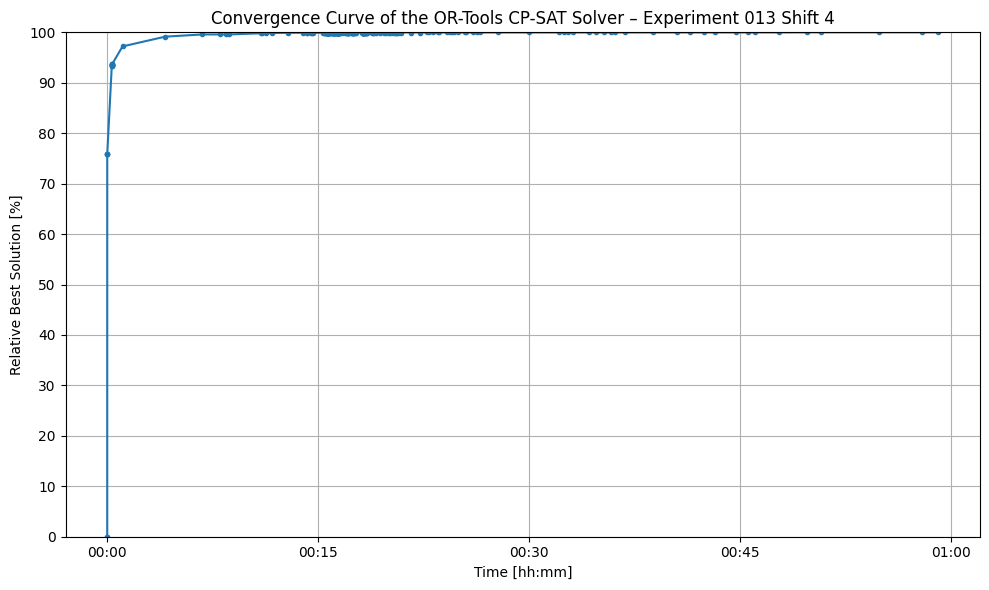

In [5]:
# DataFrame df_cp_logs existiert bereits
fig = DataFramePlotGenerator.get_relative_convergence_plot_figure(
    df_cp_logs,
    time_col="Time",
    bestsol_col="BestSol",
    subtitle="Experiment 013 Shift 4",
    max_time=3600,        # optional: nur erste 3600 Sekunden
    granularity="auto",   # optional
    marker="."
)

plt.show()